In [1]:
import pandas as pd
import numpy as np
import os
import sys
import scanpy as sc
import anndata as ad
import scipy
import time
import gget
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import linear_model

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import matplotlib.patheffects as pe

"""WARNING: disabling future warnings"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # and to omit tensorflow logging

# local 
import utils as ut

In [2]:
fullpath = "/nfs/turbo/umms-indikar/shared/projects/MC3R/processed_data/all_clustered.h5ad"
raw = sc.read(fullpath)

# filter out non-neurons
adata = raw[raw.obs['cell_type'] == 'Neurons']
pdf = adata.copy()
pdf

AnnData object with n_obs × n_vars = 33647 × 25060
    obs: 'batch', 'reference_embedding_C7_named', 'reference_embedding_C25_named', 'C25_named', 'C7_named', 'reference_embedding_C7_named_clean', 'reference_embedding_C25_named_clean', 'C25_named_clean', 'C7_named_clean', 'UMAP1', 'UMAP2', 'Diet', 'Sex', 'broad_type', 'n_genes', 'color', 'leiden', 'cluster_num', 'Cluster', 'cluster_cat', 'U1', 'U2', 'cell_type'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Cluster', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [3]:
def cluster_sample(adata, 
                   n_genes=1000, 
                   n_pca=50, 
                   n_neighbor=51, 
                   resolution=0.5,
                   neighbors_key='neighbor_key',
                   cluster_key='cluster_key'):

    """A function to cluster a sample of the data """
    sc.pp.highly_variable_genes(adata, 
                                n_top_genes=n_genes, 
                                flavor='seurat_v3',
                                batch_key='batch')
    
    sc.tl.pca(adata, 
              n_comps=n_pca, 
              zero_center=True,
              use_highly_variable=True)
    
    sc.pp.neighbors(adata, 
                    n_neighbors=n_neighbor, 
                    key_added=neighbors_key)
    
    sc.tl.leiden(adata, 
                 resolution=resolution,
                 neighbors_key=neighbors_key,
                 key_added=cluster_key)

    return adata


def get_silhouette_score(adata, cluster_key='cluster_key'):
    """A function to score clusters"""
    score = metrics.silhouette_score(adata.obsm['X_pca'], 
                                     adata.obs[cluster_key])
    return score
    
    
fraction = 0.1
test = sc.pp.subsample(pdf, fraction=fraction, copy=True)
test = cluster_sample(test)
score = get_silhouette_score(test)
print(f"{score=}")

test

/home/cstansbu/.local/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12040. The TBB threading layer is disabled.
  warnings.warn(problem)


score=0.09955271


AnnData object with n_obs × n_vars = 3364 × 25060
    obs: 'batch', 'reference_embedding_C7_named', 'reference_embedding_C25_named', 'C25_named', 'C7_named', 'reference_embedding_C7_named_clean', 'reference_embedding_C25_named_clean', 'C25_named_clean', 'C7_named_clean', 'UMAP1', 'UMAP2', 'Diet', 'Sex', 'broad_type', 'n_genes', 'color', 'leiden', 'cluster_num', 'Cluster', 'cluster_cat', 'U1', 'U2', 'cell_type', 'cluster_key'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'Cluster', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'umap', 'neighbor_key'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'neighbor_key_distances', 'neighbor_key_connectivities'

# Fraction of the sample

In [4]:
fraction = 0.25

# The number of genes

n_genes=16...
n_genes=117...
n_genes=219...
n_genes=321...
n_genes=422...
n_genes=524...
n_genes=626...
n_genes=728...
n_genes=829...
n_genes=931...
n_genes=1033...
n_genes=1134...
n_genes=1236...
n_genes=1338...
n_genes=1440...
n_genes=1541...
n_genes=1643...
n_genes=1745...
n_genes=1846...
n_genes=1948...
n_genes=2050...
n_genes=2152...
n_genes=2253...
n_genes=2355...
n_genes=2457...
n_genes=2558...
n_genes=2660...
n_genes=2762...
n_genes=2864...
n_genes=2965...
n_genes=3067...
n_genes=3169...
n_genes=3270...
n_genes=3372...
n_genes=3474...
n_genes=3576...
n_genes=3677...
n_genes=3779...
n_genes=3881...
n_genes=3982...
n_genes=4084...
n_genes=4186...
n_genes=4288...
n_genes=4389...
n_genes=4491...
n_genes=4593...
n_genes=4694...
n_genes=4796...
n_genes=4898...
n_genes=5000...

score_min=0.035
score_max=0.171
impact=0.136



,n_genes,n_clusters,score
0,16,12,0.035487
1,117,13,0.121099
2,219,14,0.133136
3,321,13,0.143046
4,422,14,0.141808


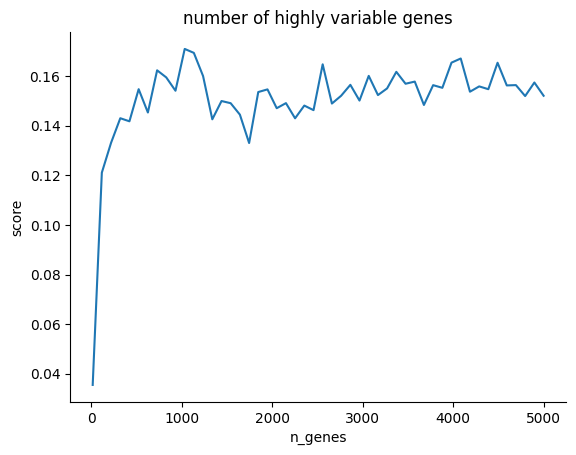

In [5]:
# generate new sample
test = sc.pp.subsample(pdf, fraction=fraction, copy=True)

res = []
for n_genes in np.linspace(16, 5000, 50).astype(int):
    print(f"{n_genes=}...")
    clustered = cluster_sample(test, n_genes=n_genes, n_pca=15)
    score = get_silhouette_score(clustered)

    row = {
        'n_genes' : n_genes,
        'n_clusters' : clustered.obs['cluster_key'].nunique(),
        'score' : score
    }
    res.append(row)

res = pd.DataFrame(res)

sns.lineplot(data=res, 
             x='n_genes',
             y='score')
plt.title('number of highly variable genes')
sns.despine()

score_min = res['score'].min()
score_max= res['score'].max()
impact = score_max - score_min

print()
print(f"{score_min=:.3f}")
print(f"{score_max=:.3f}")
print(f"{impact=:.3f}")
print()
res.head()

# Number of components

n_pca=5...
n_pca=6...
n_pca=8...
n_pca=10...
n_pca=12...
n_pca=14...
n_pca=16...
n_pca=18...
n_pca=20...
n_pca=21...
n_pca=23...
n_pca=25...
n_pca=27...
n_pca=29...
n_pca=31...
n_pca=33...
n_pca=35...
n_pca=36...
n_pca=38...
n_pca=40...
n_pca=42...
n_pca=44...
n_pca=46...
n_pca=48...
n_pca=50...

score_min=0.097
score_max=0.271
impact=0.174



,n_pca,n_clusters,score,n_genes
0,5,10,0.220974,1k
1,5,10,0.271139,3k
2,5,11,0.248172,5k
3,6,10,0.206175,1k
4,6,9,0.222972,3k


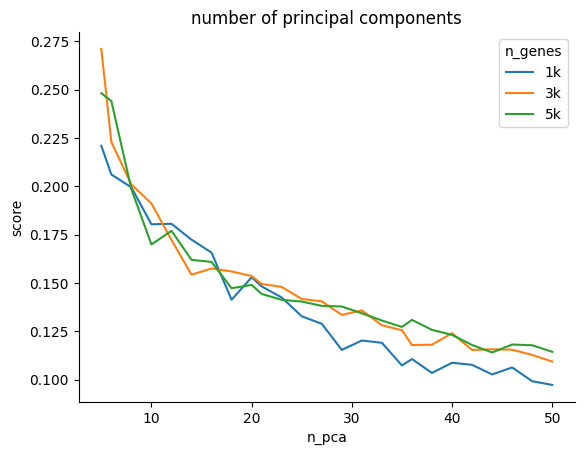

In [6]:
# generate new sample
test = sc.pp.subsample(pdf, fraction=fraction, copy=True)

res = []
for n_pca in np.linspace(5, 50, 25).astype(int):
    print(f"{n_pca=}...")
    clustered = cluster_sample(test, n_genes=1000, n_pca=n_pca)
    score = get_silhouette_score(clustered)

    row = {
        'n_pca' : n_pca,
        'n_clusters' : clustered.obs['cluster_key'].nunique(),
        'score' : score,
        'n_genes' : '1k',
    }
    res.append(row)

    clustered = cluster_sample(test, n_genes=3000, n_pca=n_pca)
    score = get_silhouette_score(clustered)

    row = {
        'n_pca' : n_pca,
        'n_clusters' : clustered.obs['cluster_key'].nunique(),
        'score' : score,
        'n_genes' : '3k',
    }
    res.append(row)

    clustered = cluster_sample(test, n_genes=5000, n_pca=n_pca)
    score = get_silhouette_score(clustered)

    row = {
        'n_pca' : n_pca,
        'n_clusters' : clustered.obs['cluster_key'].nunique(),
        'score' : score,
        'n_genes' : '5k',
    }
    res.append(row)

res = pd.DataFrame(res)

sns.lineplot(data=res, 
             x='n_pca',
             y='score',
             hue='n_genes')

plt.title('number of principal components')
sns.despine()

score_min = res['score'].min()
score_max= res['score'].max()
impact = score_max - score_min

print()
print(f"{score_min=:.3f}")
print(f"{score_max=:.3f}")
print(f"{impact=:.3f}")
print()
res.head()

# Neighbors

n_neighbor=5...
n_neighbor=14...
n_neighbor=24...
n_neighbor=33...
n_neighbor=43...
n_neighbor=52...
n_neighbor=62...
n_neighbor=71...
n_neighbor=81...
n_neighbor=91...

score_min=0.116
score_max=0.173
impact=0.057



,n_neighbor,n_clusters,score,n_pca
0,5,21,0.151358,15
1,5,27,0.115563,25
2,14,17,0.160845,15
3,14,18,0.129563,25
4,24,15,0.167334,15


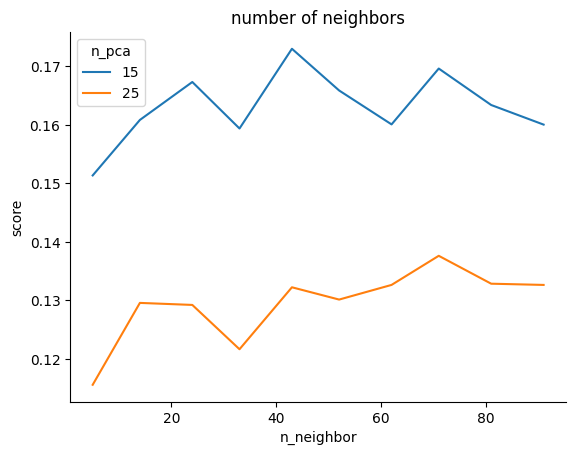

In [7]:
# generate new sample
test = sc.pp.subsample(pdf, fraction=fraction, copy=True)

res = []
for n_neighbor in np.linspace(5, 91, 10).astype(int):
    print(f"{n_neighbor=}...")
    clustered = cluster_sample(test, 
                               n_genes=1000, 
                               n_pca=15,
                               n_neighbor=n_neighbor)
    score = get_silhouette_score(clustered)

    row = {
        'n_neighbor' : n_neighbor,
        'n_clusters' : clustered.obs['cluster_key'].nunique(),
        'score' : score,
        'n_pca' : '15'
    }
    res.append(row)

    clustered = cluster_sample(test, 
                               n_genes=1000, 
                               n_pca=25,
                               n_neighbor=n_neighbor)
    score = get_silhouette_score(clustered)

    row = {
        'n_neighbor' : n_neighbor,
        'n_clusters' : clustered.obs['cluster_key'].nunique(),
        'score' : score,
        'n_pca' : '25'
    }
    res.append(row)


res = pd.DataFrame(res)

sns.lineplot(data=res, 
             x='n_neighbor',
             y='score',
             hue='n_pca')

plt.title('number of neighbors')
sns.despine()

score_min = res['score'].min()
score_max= res['score'].max()
impact = score_max - score_min

print()
print(f"{score_min=:.3f}")
print(f"{score_max=:.3f}")
print(f"{impact=:.3f}")
print()
res.head()

n_neighbor=5...
n_neighbor=14...
n_neighbor=24...
n_neighbor=33...
n_neighbor=43...
n_neighbor=52...
n_neighbor=62...
n_neighbor=71...
n_neighbor=81...
n_neighbor=91...

score_min=0.116
score_max=0.146
impact=0.031



,n_neighbor,n_clusters,score,n_genes
0,5,27,0.115563,1k
1,5,24,0.121870,3k
2,14,18,0.129563,1k
3,14,19,0.138130,3k
4,24,19,0.129216,1k


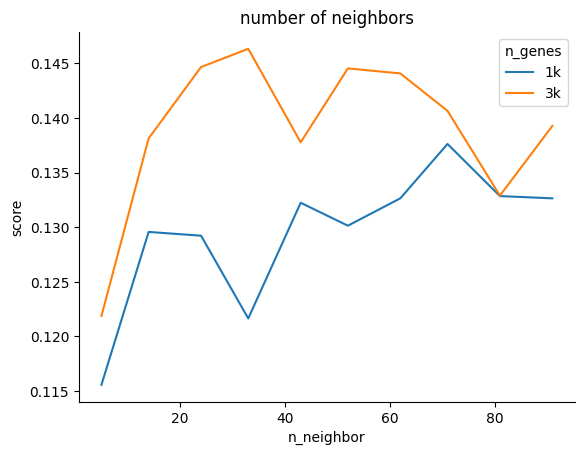

In [8]:
# generate new sample
test = sc.pp.subsample(pdf, fraction=fraction, copy=True)

res = []
for n_neighbor in np.linspace(5, 91, 10).astype(int):
    print(f"{n_neighbor=}...")
    clustered = cluster_sample(test, 
                               n_genes=1000, 
                               n_pca=25,
                               n_neighbor=n_neighbor)
    score = get_silhouette_score(clustered)

    row = {
        'n_neighbor' : n_neighbor,
        'n_clusters' : clustered.obs['cluster_key'].nunique(),
        'score' : score,
        'n_genes' : '1k'
    }
    res.append(row)

    clustered = cluster_sample(test, 
                               n_genes=3000, 
                               n_pca=25,
                               n_neighbor=n_neighbor)
    score = get_silhouette_score(clustered)

    row = {
        'n_neighbor' : n_neighbor,
        'n_clusters' : clustered.obs['cluster_key'].nunique(),
        'score' : score,
        'n_genes' : '3k'
    }
    res.append(row)


res = pd.DataFrame(res)

sns.lineplot(data=res, 
             x='n_neighbor',
             y='score',
             hue='n_genes')

plt.title('number of neighbors')
sns.despine()

score_min = res['score'].min()
score_max= res['score'].max()
impact = score_max - score_min

print()
print(f"{score_min=:.3f}")
print(f"{score_max=:.3f}")
print(f"{impact=:.3f}")
print()
res.head()

# Resolution

resolution=0.2...
resolution=0.23333333333333334...
resolution=0.26666666666666666...
resolution=0.30000000000000004...
resolution=0.33333333333333337...
resolution=0.3666666666666667...
resolution=0.4...
resolution=0.43333333333333335...
resolution=0.4666666666666667...
resolution=0.5...
resolution=0.5333333333333333...
resolution=0.5666666666666667...
resolution=0.6000000000000001...
resolution=0.6333333333333333...
resolution=0.6666666666666667...
resolution=0.7...
resolution=0.7333333333333334...
resolution=0.7666666666666666...
resolution=0.8...
resolution=0.8333333333333333...
resolution=0.8666666666666667...
resolution=0.8999999999999999...
resolution=0.9333333333333333...
resolution=0.9666666666666666...
resolution=1.0...

score_min=0.111
score_max=0.137
impact=0.026



,resolution,n_clusters,score
0,0.200000,13,0.111058
1,0.233333,13,0.112412
2,0.266667,13,0.120347
3,0.300000,15,0.127862
4,0.333333,17,0.116497


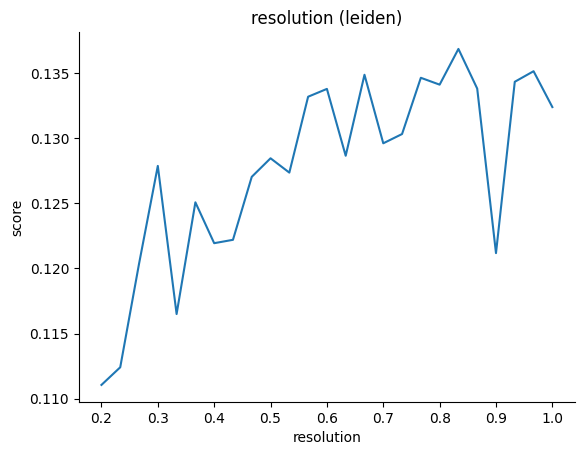

In [9]:
# generate new sample
test = sc.pp.subsample(pdf, fraction=fraction, copy=True)

res = []
for resolution in np.linspace(0.2, 1, 25):
    print(f"{resolution=}...")
    clustered = cluster_sample(test, 
                               n_genes=1000, 
                               n_pca=25,
                               n_neighbor=15,
                               resolution=resolution)

    n_clusters = clustered.obs['cluster_key'].nunique()
    if n_clusters < 2:
        score = 0
    else:
        score = get_silhouette_score(clustered)

    row = {
        'resolution' : resolution,
        'n_clusters' : n_clusters,
        'score' : score,
    }
    res.append(row)

res = pd.DataFrame(res)

sns.lineplot(data=res, 
             x='resolution',
             y='score',)

plt.title('resolution (leiden)')
sns.despine()

score_min = res['score'].min()
score_max= res['score'].max()
impact = score_max - score_min

print()
print(f"{score_min=:.3f}")
print(f"{score_max=:.3f}")
print(f"{impact=:.3f}")
print()
res.head()

# Randomly sampled space

In [10]:
def make_params(n_samples=1, 
                n_genes=(500, 2500), 
                n_pca=(5, 50),
                n_neighbor=(5, 71),
                resolution=(0, 1)):
    """A function to generate data"""

    n_genes = np.random.uniform(n_genes[0], n_genes[1], size=n_samples)
    n_pca = np.random.uniform(n_pca[0], n_pca[1], size=n_samples)
    n_neighbor = np.random.uniform(n_neighbor[0], n_neighbor[1], size=n_samples)
    resolution = np.random.uniform(resolution[0], resolution[1], size=n_samples)
                    
    params = pd.DataFrame({
        'n_genes' : n_genes,
        'n_pca' : n_pca,
        'n_neighbor' : n_neighbor,
        'resolution' : resolution,
    })

    # datatyping
    params['n_genes'] = params['n_genes'].astype(int)
    params['n_pca'] = params['n_pca'].astype(int)
    params['n_neighbor'] = params['n_neighbor'].astype(int)
    return params

                
make_params(n_samples=3).head()

,n_genes,n_pca,n_neighbor,resolution
0,1685,36,39,0.953676
1,520,6,7,0.582320
2,1451,44,19,0.107473


In [13]:
# get new sample - note that the fraction changes here
fraction = 0.1
test = sc.pp.subsample(pdf, fraction=fraction, copy=True)
n_samples = 100
params = make_params(n_samples=n_samples)

res = []
for idx, p in params.iterrows():
    
    n_genes = int(p['n_genes'])
    n_pca = int(p['n_pca'])
    n_neighbor = int(p['n_neighbor'])
    resolution = p['resolution']
    
    clustered = cluster_sample(test, 
                               n_genes=n_genes, 
                               n_pca=n_pca,
                               n_neighbor=n_neighbor,
                               resolution=resolution)

    n_clusters = clustered.obs['cluster_key'].nunique()
    if n_clusters < 2:
        score = 0
    else:
        score = get_silhouette_score(clustered)

    row = {
        'n_genes' : n_genes,
        'n_pca' : n_pca,
        'n_neighbor' : n_neighbor,
        'resolution' : resolution,
        'n_clusters' : n_clusters,
        'score' : score,
    }
    res.append(row)

res = pd.DataFrame(res)
res = res.sort_values(by='score', ascending=False)
res.head()

,n_genes,n_pca,n_neighbor,resolution,n_clusters,score
24,823,10,17,0.067056,4,0.314675
68,898,5,23,0.103727,5,0.281729
31,1677,5,42,0.413112,8,0.228768
30,2133,10,28,0.249776,6,0.227150
25,2009,27,30,0.057628,4,0.225428


In [14]:
res.head(20)

,n_genes,n_pca,n_neighbor,resolution,n_clusters,score
24,823,10,17,0.067056,4,0.314675
68,898,5,23,0.103727,5,0.281729
31,1677,5,42,0.413112,8,0.228768
30,2133,10,28,0.249776,6,0.227150
25,2009,27,30,0.057628,4,0.225428
22,755,11,34,0.266271,6,0.214089
28,1216,5,24,0.897784,14,0.210379
81,2251,9,47,0.663917,9,0.202838
38,1544,9,36,0.309511,7,0.202413
42,2057,13,17,0.185971,6,0.201559


In [12]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)